# Classification of subregion of tracks with kNN

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

We want to train a k-NN classifier that can learn some features that are characteristic for particular areas of the world. For this purpose, we use a dataset containing tracks that only charted in one of four selected subregions (Western Europe, Northern America, Eastern Asia, or Latin America and the Caribbean). 

In [2]:
from helpers.model import get_track_feature_subregion_dataset

data = get_track_feature_subregion_dataset()
data

explicit  danceability  energy  key  loudness  mode  \
id                                                                            
000RW47rhEkSqjgTrZx7YX     False         0.752   0.620  5.0    -5.536   1.0   
000xYdQfIZ4pDmBGzQalKU     False         0.509   0.803  0.0    -6.743   1.0   
001b8t3bYPfnabpjpfG1Y4      True         0.772   0.635  9.0    -4.846   1.0   
003VDDA7J3Xb2ZFlNx7nIZ      True         0.842   0.578  6.0    -6.050   0.0   
006Q8ORZ9zPjf3IiO5evwX      True         0.820   0.518  9.0   -10.497   1.0   
...                          ...           ...     ...  ...       ...   ...   
7ztdl6cnbJgHRdMkKldkts     False         0.641   0.618  0.0    -4.269   1.0   
7zvGNZu33bC4jZEkXHdDZ6     False         0.661   0.834  8.0    -4.426   1.0   
7zxRMhXxJMQCeDDg0rKAVo      True         0.744   0.715  0.0    -6.103   1.0   
7zyZ9yPXIQebb79PrMghpV     False         0.596   0.864  8.0    -3.850   1.0   
7zzhknA0A39TH81meuX7WA      True         0.939   0.700  9.0    -6.526   0.0   

                        speechiness  acousticness  instrumentalness  liveness  \
id                                                                              
000RW47rhEkSqjgTrZx7YX       0.0509       0.30900          0.000000    0.0750   
000xYdQfIZ4pDmBGzQalKU       0.0400       0.68400          0.000539    0.4630   
001b8t3bYPfnabpjpfG1Y4       0.3720       0.10500          0.000000    0.1170   
003VDDA7J3Xb2ZFlNx7nIZ       0.1380       0.00419          0.000000    0.2280   
006Q8ORZ9zPjf3IiO5evwX       0.3380       0.32100          0.000000    0.0891   
...                             ...           ...               ...       ...   
7ztdl6cnbJgHRdMkKldkts       0.0259       0.09320          0.000000    0.1550   
7zvGNZu33bC4jZEkXHdDZ6       0.0772       0.11800          0.000000    0.2730   
7zxRMhXxJMQCeDDg0rKAVo       0.3510       0.10100          0.000000    0.0919   
7zyZ9yPXIQebb79PrMghpV       0.0400       0.08580          0.000000    0.1580   
7zzhknA0A39TH81meuX7WA       0.0519       0.18700          0.000000    0.0940   

                        valence    tempo  duration_ms  time_signature  \
id                                                                      
000RW47rhEkSqjgTrZx7YX    0.962  117.399     164459.0             4.0   
000xYdQfIZ4pDmBGzQalKU    0.651  166.018     187119.0             4.0   
001b8t3bYPfnabpjpfG1Y4    0.541   95.951     167866.0             4.0   
003VDDA7J3Xb2ZFlNx7nIZ    0.190   74.496     236779.0             4.0   
006Q8ORZ9zPjf3IiO5evwX    0.746   75.987     146842.0             4.0   
...                         ...      ...          ...             ...   
7ztdl6cnbJgHRdMkKldkts    0.338   90.032     271160.0             4.0   
7zvGNZu33bC4jZEkXHdDZ6    0.652  169.952     153423.0             4.0   
7zxRMhXxJMQCeDDg0rKAVo    0.340  154.962     179773.0             4.0   
7zyZ9yPXIQebb79PrMghpV    0.833  169.123     167503.0             4.0   
7zzhknA0A39TH81meuX7WA    0.886  132.004     279467.0             4.0   

                        single_release    region  \
id                                                 
000RW47rhEkSqjgTrZx7YX           False  Americas   
000xYdQfIZ4pDmBGzQalKU           False  Americas   
001b8t3bYPfnabpjpfG1Y4           False    Europe   
003VDDA7J3Xb2ZFlNx7nIZ            True  Americas   
006Q8ORZ9zPjf3IiO5evwX           False    Europe   
...                                ...       ...   
7ztdl6cnbJgHRdMkKldkts           False      Asia   
7zvGNZu33bC4jZEkXHdDZ6           False  Americas   
7zxRMhXxJMQCeDDg0rKAVo           False  Americas   
7zyZ9yPXIQebb79PrMghpV           False  Americas   
7zzhknA0A39TH81meuX7WA           False    Europe   

                                              subregion  
id                                                       
000RW47rhEkSqjgTrZx7YX  Latin America and the Caribbean  
000xYdQfIZ4pDmBGzQalKU  Latin America and the Caribbean  
001b8t3bYPfnabpjpfG1Y4                   Western Europe  
003VDDA7J3Xb2ZFlNx7nIZ   

In [3]:
data[["region", "subregion"]].drop_duplicates()

region                        subregion
id                                                               
000RW47rhEkSqjgTrZx7YX  Americas  Latin America and the Caribbean
001b8t3bYPfnabpjpfG1Y4    Europe                   Western Europe
003VDDA7J3Xb2ZFlNx7nIZ  Americas                 Northern America
00FVmIy2twfxxY4wVLazft      Asia                     Eastern Asia

The subregions are the target labels for our dataset. We can disregard the region column, all other columns are features that could be used by a classifier.

In [4]:
X = data.drop(columns=["region", "subregion"])
y = data.subregion

In [5]:
y.value_counts() / len(y)

Western Europe                     0.511673
Latin America and the Caribbean    0.246276
Eastern Asia                       0.149516
Northern America                   0.092536
Name: subregion, dtype: float64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022, test_size=0.25, stratify=y)

In [7]:
y_train.value_counts() / len(y_train)

Western Europe                     0.511673
Latin America and the Caribbean    0.246263
Eastern Asia                       0.149498
Northern America                   0.092566
Name: subregion, dtype: float64

## Dummy classifier baseline

In [8]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_test, y_test)

0.5116707616707616

In [9]:
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_test, y_test)

0.2503071253071253

## Training basic KNN classifier and finding optimal parameters

For a k-NN classifier, data should always be on equal scale for all variables.

In [10]:
k_vals_to_try = np.arange(1, 21)
metrics_to_try = ['manhattan', 'euclidean', 'chebyshev']
weights_to_try = ['uniform', 'distance']

scaled_knn = Pipeline(
    [
        ('scaler', MinMaxScaler()),
        ('knn', KNeighborsClassifier())
    ]
)

knn_params = {
    "knn__n_neighbors": k_vals_to_try,
    "knn__metric": metrics_to_try,
    "knn__weights": weights_to_try
}

scaled_knn_cv = GridSearchCV(
    scaled_knn,
    knn_params,
    verbose=10
)

In [11]:
scaled_knn_cv.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 1/5; 1/120] END knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform;, score=0.615 total time=   0.1s
[CV 2/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 2/5; 1/120] END knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform;, score=0.599 total time=   0.1s
[CV 3/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 3/5; 1/120] END knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform;, score=0.607 total time=   0.1s
[CV 4/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 4/5; 1/120] END knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform;, score=0.619 total time=   0.1s
[CV 5/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 5/5; 1/120] END knn__metric=manhatt

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'chebyshev'],
                         'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'knn__weights': ['uniform', 'distance']},
             verbose=10)

In [12]:
scaled_knn_cv.best_params_

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 15,
 'knn__weights': 'distance'}

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 15,
 'knn__weights': 'distance'}

In [13]:
best_scaled_knn = scaled_knn_cv.best_estimator_
best_scaled_knn.score(X_test, y_test)

0.6765970515970516

0.6765970515970516

## Trying standard scaling instead of min-max scaling

In [14]:
std_knn = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ]
)

std_knn_cv = GridSearchCV(
    std_knn,
    {**knn_params},
    verbose=10,
    n_jobs=-1) # run jobs in parallel on all available processors

In [15]:
std_knn_cv.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 2/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 3/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 4/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 5/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 2/5; 2/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 1/5; 2/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 4/5; 2/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 2/5; 3/120] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 3/5; 2/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 5/5; 2/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__wei

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'chebyshev'],
                         'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'knn__weights': ['uniform', 'distance']},
             verbose=10)

In [16]:
std_knn_cv.best_params_

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 12,
 'knn__weights': 'distance'}

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 12,
 'knn__weights': 'distance'}

In [17]:
best_std_knn = std_knn_cv.best_estimator_
best_std_knn.score(X_test, y_test)

0.7051597051597052

0.7051597051597052

In [18]:
import skops.io as sio
sio.dump(best_std_knn, "best_std_knn.joblib")

Apparently standardization of features works even better!

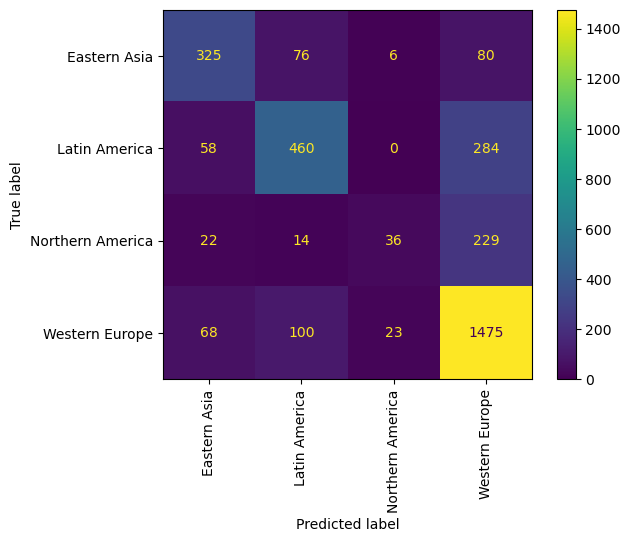

In [19]:
predictions = best_std_knn.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=best_std_knn.classes_)
labels = [l if (not l.startswith("Latin")) else "Latin America" for l in best_std_knn.classes_]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation=90)
plt.show()

### Trying PCA

Text(0, 0.5, 'cumulative explained variance')

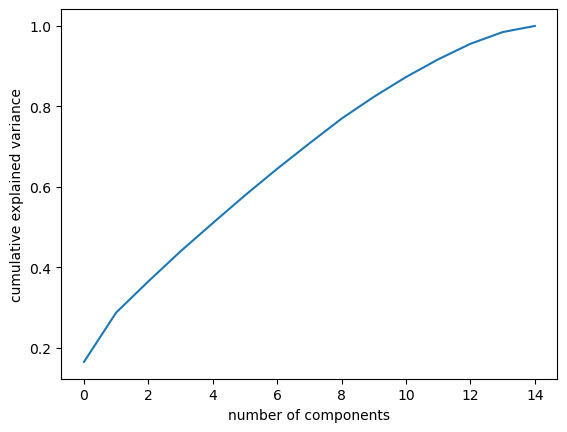

In [20]:
X_standardized = StandardScaler().fit_transform(X)
pca=PCA()
pca.fit(X_standardized)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [21]:
std_pca_knn = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('pca', PCA()),
        ('knn', KNeighborsClassifier())
    ]
)

pca_params = {
    "pca__n_components": np.arange(1,12)
}

pca_knn_cv = GridSearchCV(
    std_pca_knn,
    {**pca_params, **knn_params},
    verbose=10,
    n_jobs=-1) # run jobs in parallel on all available processors

In [22]:
pca_knn_cv.fit(X_train,y_train)

Fitting 5 folds for each of 1320 candidates, totalling 6600 fits
[CV 1/5; 1/1320] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform, pca__n_components=1
[CV 2/5; 1/1320] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform, pca__n_components=1
[CV 3/5; 1/1320] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform, pca__n_components=1
[CV 4/5; 1/1320] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform, pca__n_components=1
[CV 5/5; 1/1320] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform, pca__n_components=1
[CV 1/5; 2/1320] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform, pca__n_components=2
[CV 2/5; 2/1320] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform, pca__n_components=2
[CV 1/5; 1/1320] END knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform, pca__n_components=1;, score=0.410 total time=   0.1s
[CV 2/5; 1/1320] END knn__metric=manhatt

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'chebyshev'],
                         'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'knn__weights': ['uniform', 'distance'],
                         'pca__n_components': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])},
             verbose=10)

In [23]:
pca_knn_cv.best_params_

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 20,
 'knn__weights': 'distance',
 'pca__n_components': 7}

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 20,
 'knn__weights': 'distance',
 'pca__n_components': 7}

In [24]:
best_pca_knn = pca_knn_cv.best_estimator_
best_pca_knn.score(X_test, y_test)

0.6787469287469288

0.6787469287469288

No improvement compared to the kNN model with standardized input data!

## Trying feature selection

In [25]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [26]:
std_kbest_knn = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("kbest", SelectKBest(f_classif)),
        ("knn", KNeighborsClassifier()),
    ]
)

kbest_params = {
    "kbest__k": np.arange(1, len(X.columns) + 1)
}

std_kbest_knn_cv = GridSearchCV(
    std_kbest_knn, {**knn_params, **kbest_params}, verbose=10, n_jobs=-1
)  # run jobs in parallel on all available processors


In [27]:
std_kbest_knn_cv.fit(X_train, y_train)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits
[CV 1/5; 1/1800] START kbest__k=1, knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 2/5; 1/1800] START kbest__k=1, knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 3/5; 1/1800] START kbest__k=1, knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 4/5; 1/1800] START kbest__k=1, knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 5/5; 1/1800] START kbest__k=1, knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 1/5; 2/1800] START kbest__k=1, knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 2/5; 2/1800] START kbest__k=1, knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 3/5; 2/1800] START kbest__k=1, knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 4/5; 2/1800] START kbest__k=1, knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 5/5; 2/1800] START kbest__k=1, knn__

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('kbest', SelectKBest()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kbest__k': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                         'knn__metric': ['manhattan', 'euclidean', 'chebyshev'],
                         'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'knn__weights': ['uniform', 'distance']},
             verbose=10)

In [28]:
std_kbest_knn_cv.best_params_

{'kbest__k': 14,
 'knn__metric': 'manhattan',
 'knn__n_neighbors': 11,
 'knn__weights': 'distance'}

In [29]:
best_std_kbest_knn = std_kbest_knn_cv.best_estimator_
best_std_kbest_knn.score(X_test, y_test)

0.7014742014742015

## Dealing with imbalanced data

I have read that imbalanced data is a problem for k-NN. Therefore, let's try to correct the class imbalance in our training data. maybe this will improve performance of the classifier.

In [30]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=2022)

X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [31]:
y_train.value_counts()

Western Europe                     4997
Latin America and the Caribbean    2405
Eastern Asia                       1460
Northern America                    904
Name: subregion, dtype: int64

In [32]:
y_train_ros.value_counts()

Eastern Asia                       4997
Latin America and the Caribbean    4997
Northern America                   4997
Western Europe                     4997
Name: subregion, dtype: int64

In [33]:
std_knn_cv.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 2/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 3/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 4/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 5/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 1/5; 2/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 2/5; 2/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 3/5; 2/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 4/5; 2/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 5/5; 2/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 1/5; 3/120] START knn__metric=manhattan, knn__n_neighbors=2, knn__we

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'chebyshev'],
                         'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'knn__weights': ['uniform', 'distance']},
             verbose=10)

In [34]:
std_knn_cv.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__weights': 'uniform'}

In [35]:
best_std_knn_oversampled = std_knn_cv.best_estimator_
best_std_knn_oversampled.score(X_test, y_test)

0.6554054054054054

## Trying undersampling

### with imblearn

There are sophisticated approaches to do this, but I lack the knowledge to understand them before the submission deadline lol

In [36]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=2022)

In [37]:
X_train_resampled, y_train_resampled = cc.fit_resample(X_train, y_train)

/home/sejmou/anaconda3/envs/sejmouvisds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sejmou/anaconda3/envs/sejmouvisds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sejmou/anaconda3/envs/sejmouvisds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
std_knn_cv.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 2/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 3/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 4/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 5/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 1/5; 2/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 2/5; 2/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 3/5; 2/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 4/5; 2/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 5/5; 2/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 1/5; 3/120] START knn__metric=manhattan, knn__n_neighbors=2, knn__we

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'chebyshev'],
                         'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'knn__weights': ['uniform', 'distance']},
             verbose=10)

In [39]:
std_knn_cv.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 8, 'knn__weights': 'distance'}

In [40]:
best_std_knn_centroids_undersample = std_knn_cv.best_estimator_
best_std_knn_centroids_undersample.score(X_test, y_test)

0.3882063882063882

I guess this is not the way this was meant to be used lol

### Naive undersampling (shrinking the majority class to second-largest class)

In [41]:
import pandas as pd

In [42]:
train_naive_resample = X_train.copy()
train_naive_resample["target"] = y_train

In [43]:
majority_class = train_naive_resample.loc[train_naive_resample["target"] == "Western Europe"]

In [44]:
remaining_classes = train_naive_resample.loc[train_naive_resample["target"] != "Western Europe"]

In [45]:
majority_class_undersampled = majority_class.sample(remaining_classes.groupby("target").size().max(), random_state=2022)

In [46]:
train_naive_resample = pd.concat([majority_class_undersampled, remaining_classes]).sample(frac=1)

In [47]:
X_train_naive_resample = train_naive_resample.drop("target", axis=1)
y_train_naive_resample = train_naive_resample["target"]

In [48]:
std_knn_cv.fit(X_train_naive_resample, y_train_naive_resample)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 2/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 3/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 4/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 5/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 1/5; 2/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 2/5; 2/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 3/5; 2/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 4/5; 2/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 5/5; 2/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 1/5; 3/120] START knn__metric=manhattan, knn__n_neighbors=2, knn__we

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'chebyshev'],
                         'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'knn__weights': ['uniform', 'distance']},
             verbose=10)

In [49]:
std_knn_cv.best_params_

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 16,
 'knn__weights': 'distance'}

In [50]:
best_std_knn_naive_undersample = std_knn_cv.best_estimator_
best_std_knn_naive_undersample.score(X_test, y_test)

0.6790540540540541

In [51]:
y_test.value_counts()

Western Europe                     1666
Latin America and the Caribbean     802
Eastern Asia                        487
Northern America                    301
Name: subregion, dtype: int64

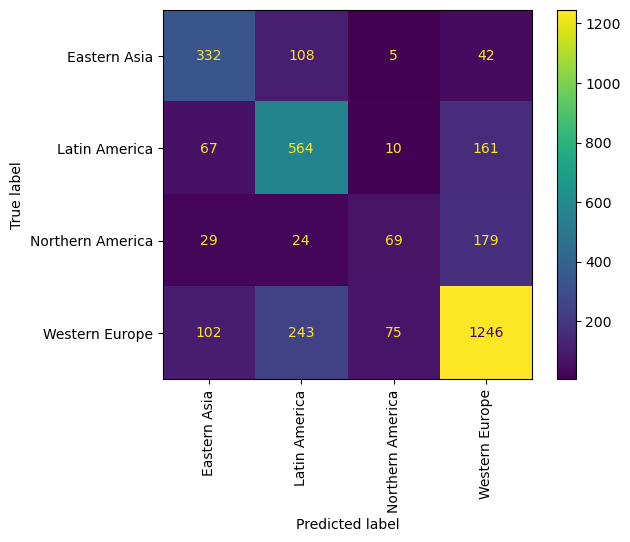

In [52]:
predictions = best_std_knn_naive_undersample.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=best_std_knn_naive_undersample.classes_)
labels = [l if (not l.startswith("Latin")) else "Latin America" for l in best_std_knn_naive_undersample.classes_]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation=90)
plt.show()

## Combining undersampling with oversampling (oversampling to size of second-largest group of initial dataset)

In [64]:
X_train_naive_undersample_ros, y_train_naive_undersample_ros = ros.fit_resample(X_train_naive_resample, y_train_naive_resample)

In [65]:
std_knn_cv2 = GridSearchCV(
    std_knn,
    {**knn_params},
    verbose=10,
    n_jobs=-1) # run jobs in parallel on all available processors

std_knn_cv2.fit(X_train_naive_undersample_ros, y_train_naive_undersample_ros)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 2/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 3/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 4/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 5/5; 1/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=uniform
[CV 5/5; 2/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 2/5; 2/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 2/5; 3/120] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 3/5; 2/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 4/5; 2/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__weights=distance
[CV 1/5; 2/120] START knn__metric=manhattan, knn__n_neighbors=1, knn__wei

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'chebyshev'],
                         'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'knn__weights': ['uniform', 'distance']},
             verbose=10)

In [66]:
std_knn_cv2.best_params_

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 20,
 'knn__weights': 'distance'}

In [67]:
best_std_knn_naive_undersample_oversample = std_knn_cv2.best_estimator_
best_std_knn_naive_undersample_oversample.score(X_test, y_test)

0.6074938574938575

Would have been funny if that would have improved results, but it didn't lol

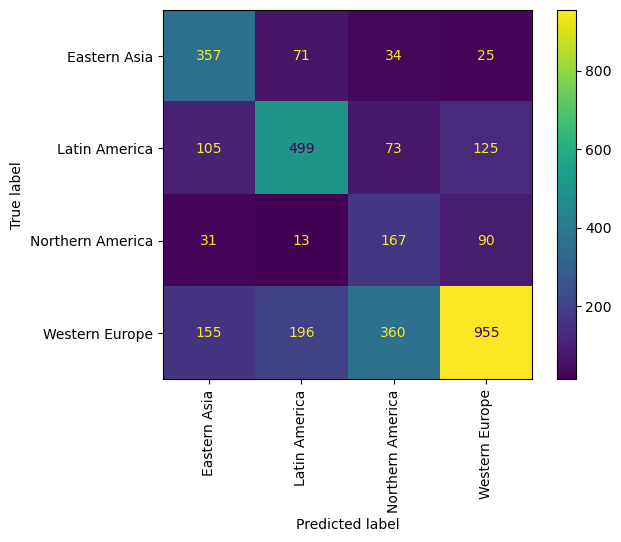

In [68]:
predictions = best_std_knn_naive_undersample_oversample.predict(X_test)
labels = [l if (not l.startswith("Latin")) else "Latin America" for l in best_std_knn_naive_undersample_oversample.classes_]
cm = confusion_matrix(y_test, predictions, labels=best_std_knn_naive_undersample_oversample.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation=90)
plt.show()

In [72]:
from sklearn.metrics import accuracy_score, classification_report

k-NN (std., Manhattan, k=12) 0.7051597051597052
                                 precision    recall  f1-score   support

                   Eastern Asia       0.69      0.67      0.68       487
Latin America and the Caribbean       0.71      0.57      0.63       802
               Northern America       0.55      0.12      0.20       301
                 Western Europe       0.71      0.89      0.79      1666

                       accuracy                           0.71      3256
                      macro avg       0.67      0.56      0.57      3256
                   weighted avg       0.69      0.71      0.68      3256

{'memory': None, 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(metric='manhattan', n_neighbors=12, weights='distance'))], 'verbose': False, 'scaler': StandardScaler(), 'knn': KNeighborsClassifier(metric='manhattan', n_neighbors=12, weights='distance'), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'knn__algorith

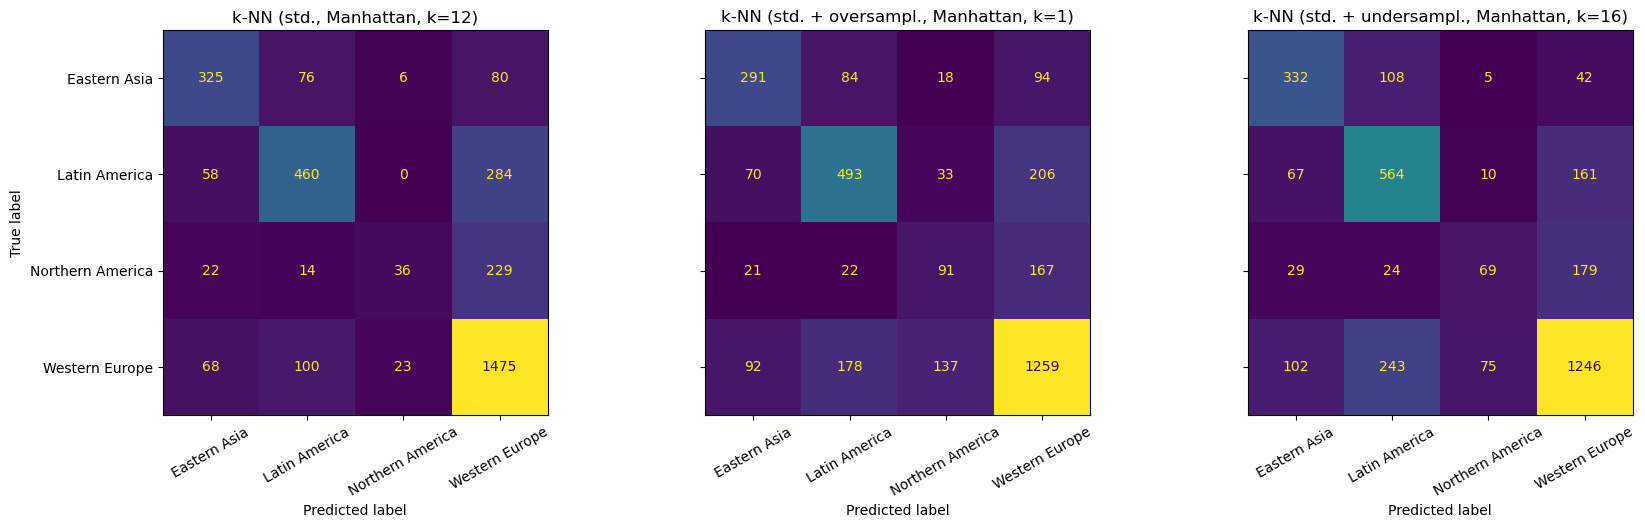

In [85]:

classifiers = (
  ('k-NN (std., Manhattan, k=12)', best_std_knn),
  ('k-NN (std. + oversampl., Manhattan, k=1)', best_std_knn_oversampled),
  ('k-NN (std. + undersampl., Manhattan, k=16)', best_std_knn_naive_undersample),
  # ('k-NN (PCA)', best_pca_knn)
  # ('k-NN (standardized, naive undersampled, oversampled)', best_std_knn_naive_undersample_oversample)
)


f, axes = plt.subplots(1, len(classifiers), figsize=(19, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers):
    y_pred = classifier.predict(X_test)
    print(key, accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(classifier.get_params())
    cf_matrix = confusion_matrix(y_test, y_pred)
    labels = [l if (not l.startswith("Latin")) else "Latin America" for l in classifier.classes_]
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=labels)
    disp.plot(ax=axes[i], xticks_rotation=30)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('Predicted label')
    if i!=0:
        disp.ax_.set_ylabel('')

plt.subplots_adjust(wspace=0.40, hspace=0.1)